Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.53MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:06<00:00, 245kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.84MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/20], Loss: 0.2636
Epoch [2/20], Loss: 0.1605
Epoch [3/20], Loss: 0.1323
Epoch [4/20], Loss: 0.1188
Epoch [5/20], Loss: 0.1116
Epoch [6/20], Loss: 0.1062
Epoch [7/20], Loss: 0.1019
Epoch [8/20], Loss: 0.0982
Epoch [9/20], Loss: 0.0954
Epoch [10/20], Loss: 0.0931
Epoch [11/20], Loss: 0.0913
Epoch [12/20], Loss: 0.0900
Epoch [13/20], Loss: 0.0888
Epoch [14/20], Loss: 0.0879
Epoch [15/20], Loss: 0.0870
Epoch [16/20], Loss: 0.0863
Epoch [17/20], Loss: 0.0856
Epoch [18/20], Loss: 0.0849
Epoch [19/20], Loss: 0.0843
Epoch [20/20], Loss: 0.0837


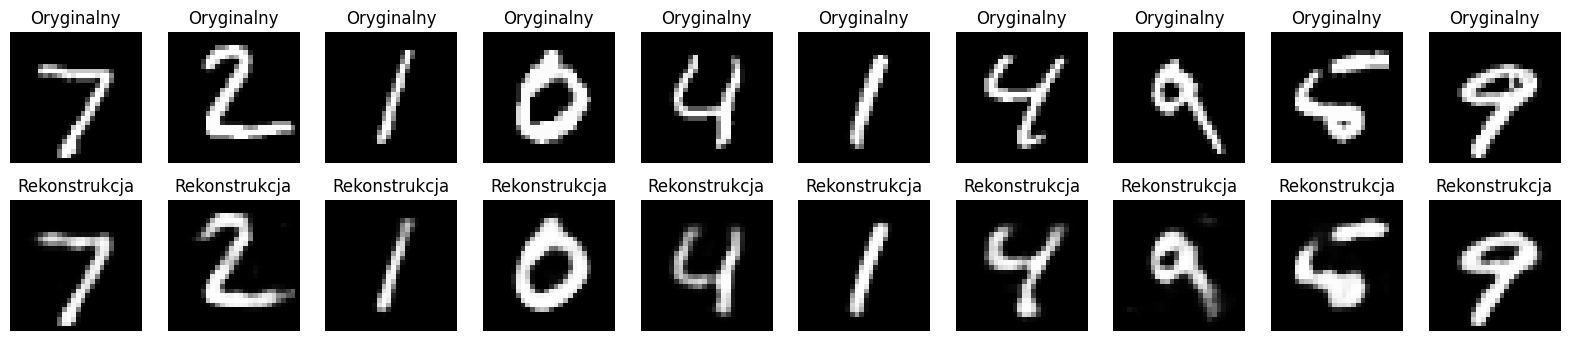

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 1. ustawiam urządenie do obliczeń, batch_size, liczbę epok, learning_rate
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 256
epochs = 20
learning_rate = 0.001

# 2. Załaduj dane MNIST z poprawną normalizacją
transform = transforms.Compose([
    transforms.ToTensor()  # Przekształca do zakresu [0, 1]
])

# wczytuje dane z datasetu
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# umieszczam odpowiednie dane w odpowiednich loaderach
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 3. tworzę model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        # tworzę warstwy encodera
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        # Decoder
        # tworze warstwy dekodera
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(),  # Zakres wyjścia: [0, 1]
            nn.Unflatten(1, (1, 28, 28))
        )
    # funkcja forward, przekazuje dane przez encoder i decoder
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# 4. Inicjalizacja modelu, optymalizatora i funkcji straty
# przenosi model na wskazane urządzenie
model = Autoencoder().to(device)
# inicjalizuje ffunkcję straty na binary cross entropy
criterion = nn.BCELoss()
# używa optimizera adam jak wszystko
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 5. Trenowanie modelu
# przełącza dekoder w tryb uczenia
model.train()
# przechodzi przez wszystkie epoki
for epoch in range(epochs):
  # inicjalizuje stratę treningową
    train_loss = 0
    # biorę obrazy z loadera
    for images, _ in train_loader:
        images = images.to(device)

        # Przewidywanie i obliczanie straty
        # przepuszczam obrazy przez model i obliczam stratę
        outputs = model(images)
        loss = criterion(outputs, images)

        # Backpropagacja i optymalizacja, zeruje gradienty
        optimizer.zero_grad()
        loss.backward() # robię backpropagację
        optimizer.step() # krok opytmalizatora
        # dodaje do funckji straty dla tej epoki
        train_loss += loss.item()

    # Średnia strata na epokę
    train_loss /= len(train_loader)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss:.4f}')

# 6. Testowanie i wizualizacja wyników
# przełączam model w tryb wizualizacji
model.eval()
# bez obliczania gradientu
with torch.no_grad():
    # Pobierz kilka przykładów z zestawu testowego
    # biorę
    examples = next(iter(test_loader))
    test_images, _ = examples
    test_images = test_images.to(device)
    reconstructed = model(test_images)

    # Wizualizacja
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Oryginalne obrazy
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(test_images[i].cpu().reshape(28, 28), cmap='gray')
        plt.title("Oryginalny")
        plt.axis('off')

        # Zrekonstruowane obrazy
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].cpu().reshape(28, 28), cmap='gray')
        plt.title("Rekonstrukcja")
        plt.axis('off')

    plt.show()


In [ ]:
import os

url = "https://drive.google.com/uc?id=13klNnwUUTnxylE1IASPm5IG_o6CY6B-L"
zip_filename = "frames.zip"
!gdown "{url}"

!unzip -q "{zip_filename}"

os.remove(zip_filename)

print("✅ Plik pobrany, rozpakowany i usunięty!")


Downloading...
From (original): https://drive.google.com/uc?id=13klNnwUUTnxylE1IASPm5IG_o6CY6B-L
From (redirected): https://drive.google.com/uc?id=13klNnwUUTnxylE1IASPm5IG_o6CY6B-L&confirm=t&uuid=515e011d-da9e-4589-a2af-a6cfe1f313aa
To: /content/frames.zip
100% 95.0M/95.0M [00:06<00:00, 14.4MB/s]
✅ Plik pobrany, rozpakowany i usunięty!


In [ ]:
import os
import shutil
import random

# Ścieżka do katalogu z obrazami
source_dir = '.'
train_dir = os.path.join(source_dir, 'train')
test_dir = os.path.join(source_dir, 'test')

# Ustaw procent podziału
train_split = 0.8  # 80% do treningu, 20% do testów

# Upewnij się, że katalog istnieje
if not os.path.exists(source_dir):
    raise Exception(f"Katalog {source_dir} nie istnieje.")

# Pobierz wszystkie pliki JPG, posortowane
all_images = sorted([f for f in os.listdir(source_dir) if f.endswith('.jpg')])

# Przetasuj obrazy dla losowego podziału
random.shuffle(all_images)

# Oblicz liczby obrazów do treningu i testów
train_size = int(len(all_images) * train_split)
train_images = all_images[:train_size]
test_images = all_images[train_size:]

# Utwórz katalogi, jeśli nie istnieją
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Przenieś obrazy do folderów
for img in train_images:
    src = os.path.join(source_dir, img)
    dest = os.path.join(train_dir, img)
    shutil.move(src, dest)

for img in test_images:
    src = os.path.join(source_dir, img)
    dest = os.path.join(test_dir, img)
    shutil.move(src, dest)

print(f'✅ Przeniesiono {len(train_images)} obrazów do treningu i {len(test_images)} do testów!')


✅ Przeniesiono 207 obrazów do treningu i 52 do testów!


In [ ]:
import os
import shutil

# Ścieżki do folderów
train_data_dir = './train'
test_data_dir = './test'

# Nazwa klasy (możesz zmienić na dowolną)
class_name = 'class_name'

# Utwórz podfoldery dla klasy, jeśli nie istnieją
os.makedirs(os.path.join(train_data_dir, class_name), exist_ok=True)
os.makedirs(os.path.join(test_data_dir, class_name), exist_ok=True)

# Przenieś obrazy do odpowiednich podfolderów
for folder in [train_data_dir, test_data_dir]:
    images = [f for f in os.listdir(folder) if f.endswith('.jpg')]
    for img in images:
        src = os.path.join(folder, img)
        dest = os.path.join(folder, class_name, img)
        shutil.move(src, dest)

print('✅ Przeniesiono obrazy do odpowiednich podfolderów!')


✅ Przeniesiono obrazy do odpowiednich podfolderów!


In [ ]:
from PIL import Image
import os

# Ustawienia
train_data_dir = './train'
test_data_dir = './test'
crop_size = (256, 256)  # Nowe wymiary wycinka (np. 256x256)

# Funkcja do tworzenia wycinka ze środka obrazu
def crop_center(image, new_width, new_height):
    width, height = image.size
    left = (width - new_width) // 2
    top = (height - new_height) // 2
    right = left + new_width
    bottom = top + new_height
    return image.crop((left, top, right, bottom))

# Przetwarzanie obrazów w folderach
for root_dir in [train_data_dir, test_data_dir]:
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.jpg'):
                img_path = os.path.join(subdir, file)
                with Image.open(img_path) as img:
                    # Tworzenie wycinka i zapisywanie
                    cropped_img = crop_center(img, *crop_size)
                    cropped_img.save(img_path)

print('✅ Wszystkie obrazy zostały przycięte i nadpisane!')


✅ Wszystkie obrazy zostały przycięte i nadpisane!


Epoch [1/50], Loss: 0.1825
Epoch [2/50], Loss: 0.0568
Epoch [3/50], Loss: 0.0344
Epoch [4/50], Loss: 0.0242
Epoch [5/50], Loss: 0.0201
Epoch [6/50], Loss: 0.0178
Epoch [7/50], Loss: 0.0171
Epoch [8/50], Loss: 0.0157
Epoch [9/50], Loss: 0.0148
Epoch [10/50], Loss: 0.0143
Epoch [11/50], Loss: 0.0136
Epoch [12/50], Loss: 0.0132
Epoch [13/50], Loss: 0.0129
Epoch [14/50], Loss: 0.0129
Epoch [15/50], Loss: 0.0122
Epoch [16/50], Loss: 0.0119
Epoch [17/50], Loss: 0.0119
Epoch [18/50], Loss: 0.0123
Epoch [19/50], Loss: 0.0116
Epoch [20/50], Loss: 0.0116
Epoch [21/50], Loss: 0.0110
Epoch [22/50], Loss: 0.0109
Epoch [23/50], Loss: 0.0107
Epoch [24/50], Loss: 0.0104
Epoch [25/50], Loss: 0.0104
Epoch [26/50], Loss: 0.0102
Epoch [27/50], Loss: 0.0104
Epoch [28/50], Loss: 0.0102
Epoch [29/50], Loss: 0.0099
Epoch [30/50], Loss: 0.0099
Epoch [31/50], Loss: 0.0098
Epoch [32/50], Loss: 0.0100
Epoch [33/50], Loss: 0.0097
Epoch [34/50], Loss: 0.0096
Epoch [35/50], Loss: 0.0099
Epoch [36/50], Loss: 0.0097
E

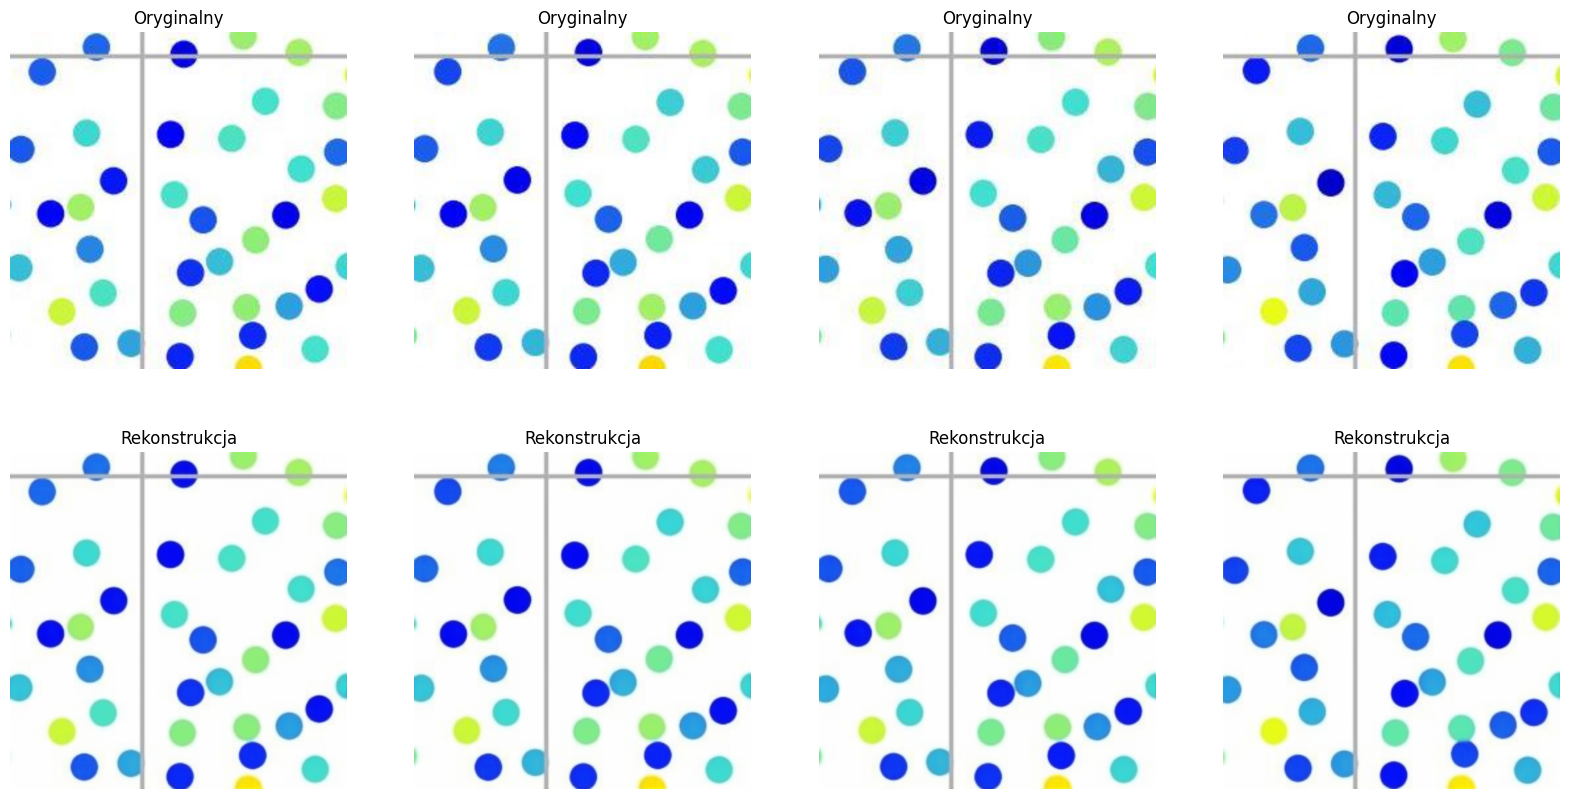

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os

# 1. Ustawienia urządzenia, batch_size, liczba epok, learning_rate
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 4  # Mały batch_size dla dużych obrazów 1024x1024
epochs = 50
learning_rate = 0.0005

# 2. Przygotowanie transformacji dla obrazków
transform = transforms.Compose([
    transforms.Resize((1024, 1024)),  # Skalowanie do 1024x1024 pikseli
    transforms.ToTensor(),            # Przekształcenie do tensoru
    transforms.Normalize((0.0, 0.0, 0.0), (1.0, 1.0, 1.0))  # Normalizacja do zakresu [0, 1]
])

# 3. Wczytywanie danych z własnego folderu
train_data_dir = './train'
test_data_dir = './test'

train_dataset = datasets.ImageFolder(root=train_data_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_data_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 4. Definicja modelu Autoenkodera
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),   # 1024 -> 512
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # 512 -> 256
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),# 256 -> 128
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),# 128 -> 64
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 1024, kernel_size=4, stride=2, padding=1),# 64 -> 32
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.Conv2d(1024, 2048, kernel_size=4, stride=2, padding=1),# 32 -> 16
            nn.BatchNorm2d(2048),
            nn.ReLU(),
            nn.Conv2d(2048, 4096, kernel_size=4, stride=2, padding=1),# 16 -> 8
            nn.BatchNorm2d(4096),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4096, 2048, kernel_size=4, stride=2, padding=1), # 8 -> 16
            nn.BatchNorm2d(2048),
            nn.ReLU(),
            nn.ConvTranspose2d(2048, 1024, kernel_size=4, stride=2, padding=1), # 16 -> 32
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1),  # 32 -> 64
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),   # 64 -> 128
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),   # 128 -> 256
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),    # 256 -> 512
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),      # 512 -> 1024
            nn.Sigmoid()  # Wyjście w zakresie [0, 1]
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# 5. Inicjalizacja modelu, optymalizatora i funkcji straty
model = Autoencoder().to(device)
criterion = nn.L1Loss()  # L1Loss dla ostrzejszych rekonstrukcji
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 6. Trenowanie modelu
model.train()
for epoch in range(epochs):
    train_loss = 0
    for images, _ in train_loader:
        images = images.to(device)

        # Przewidywanie i obliczanie straty
        outputs = model(images)
        loss = criterion(outputs, images)

        # Backpropagacja i optymalizacja
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss:.4f}')

# 7. Testowanie i wizualizacja wyników
model.eval()
with torch.no_grad():
    examples = next(iter(test_loader))
    test_images, _ = examples
    test_images = test_images.to(device)
    reconstructed = model(test_images)

    # Upewniamy się, że wartości są w zakresie [0, 1]
    test_images = test_images.clamp(0, 1)
    reconstructed = reconstructed.clamp(0, 1)

    # Wizualizacja
    n = 4
    plt.figure(figsize=(20, 10))
    for i in range(n):
        # Oryginalne obrazy
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(test_images[i].cpu().permute(1, 2, 0))
        plt.title("Oryginalny")
        plt.axis('off')

        # Zrekonstruowane obrazy
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].cpu().permute(1, 2, 0))
        plt.title("Rekonstrukcja")
        plt.axis('off')

    plt.show()

